# Import Basic Libraries & Load the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Deep_Learning_with_Meena_ma'am/housepricedata.csv")

# Data Preprocessing

In [ ]:
# To get first five records
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
# To get properties of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [ ]:
#
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


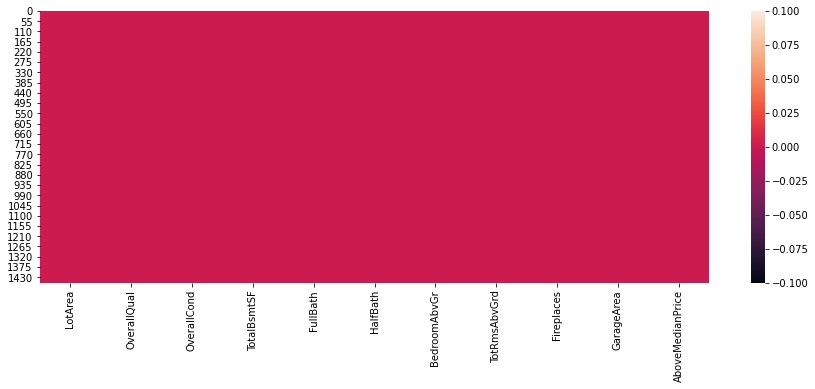

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64


In [ ]:
# To check null values by Visulization
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()
print(df.isnull().sum())

# Seperate input & output from dataset

In [ ]:
x=df.drop("AboveMedianPrice",axis=1)
y=df["AboveMedianPrice"]

# Train_test_split data (80%-Training & 20% Testing)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling input features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# To check balance of Output feature

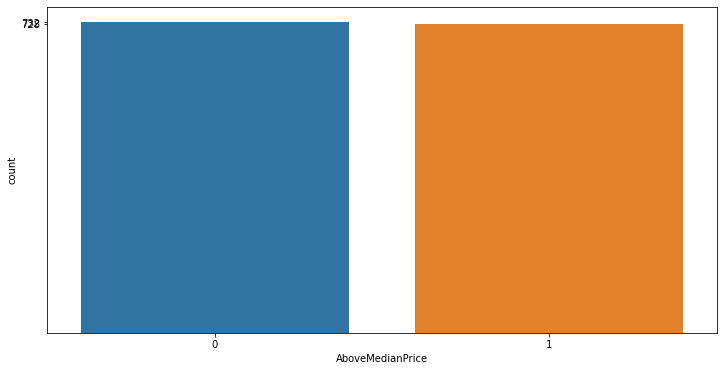

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="AboveMedianPrice")
plt.yticks(df["AboveMedianPrice"].value_counts())
plt.show()

# Create Neural Network

In [ ]:
import tensorflow as tf


In [ ]:

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10,activation='relu',input_shape=(x.shape[1],)),
                           tf.keras.layers.Dense(8,activation='relu'),
                           tf.keras.layers.Dense(6,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')

])

# To Compile the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

# To Train the model

In [ ]:
trained_model=model.fit(x_train,y_train,epochs=50,batch_size=50,validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 1s 13ms/step - loss: 0.7602 - accuracy: 0.5321 - val_loss: 0.7155 - val_accuracy: 0.6111
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5942 - val_loss: 0.6856 - val_accuracy: 0.6368
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6349 - val_loss: 0.6626 - val_accuracy: 0.7222
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.6895 - val_loss: 0.6369 - val_accuracy: 0.7350
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.7345 - val_loss: 0.6038 - val_accuracy: 0.7863
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.7794 - val_loss: 0.5633 - val_accuracy: 0.7906
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7934 - val_loss: 0.5204 - val_accuracy: 0.7949
Epoch 8/50
19/19 [=

# Visualized the history of loss of trained_model

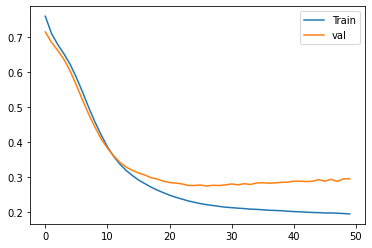

In [ ]:
plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["val_loss"])
plt.legend(["Train","val"],loc="upper right")
plt.show()

#Visualized the history of accuracy of trained_model

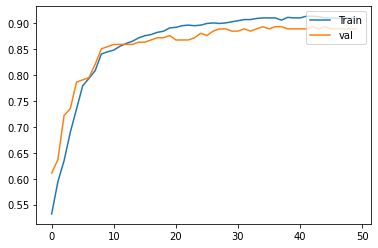

In [ ]:
plt.plot(trained_model.history["accuracy"])
plt.plot(trained_model.history["val_accuracy"])
plt.legend(["Train","val"],loc="upper right")
plt.show()

# To Test the model


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)
print(y_pred[0:5])

[[1]
 [0]
 [0]
 [1]
 [0]]


In [ ]:
print(y_test[0:5])

529    1
491    0
459    0
279    1
655    0
Name: AboveMedianPrice, dtype: int64


# To generate report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       145
           1       0.90      0.93      0.91       147

    accuracy                           0.91       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.91      0.91      0.91       292


Confusion Matrix
[[129  16]
 [ 10 137]]


# Our model seems to be overfit.
# To reduced problem of overfit we will add some error by ussing regullarization technique 

In [ ]:
from keras.layers import Dropout
from keras import regularizers

# Train the model after applying regularization & dropout technique 

In [ ]:
# Create Neural Network


model2=tf.keras.Sequential([
                            tf.keras.layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(x.shape[1],)),
                            Dropout(0.3),
                            tf.keras.layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.02)),
                            Dropout(0.3),
                            tf.keras.layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.02)),
                            Dropout(0.3),
                            tf.keras.layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.02)),
                            Dropout(0.3),
                            tf.keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.02))
                            
])

In [ ]:
# Compile model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
# Train the model
trained_model2=model2.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 2s 52ms/step - loss: 29.5445 - accuracy: 0.8469 - val_loss: 8.3197 - val_accuracy: 0.8718
Epoch 2/50
30/30 [==============================] - 1s 45ms/step - loss: 3.3738 - accuracy: 0.8961 - val_loss: 0.9229 - val_accuracy: 0.8846
Epoch 3/50
30/30 [==============================] - 1s 46ms/step - loss: 0.6206 - accuracy: 0.8972 - val_loss: 0.5283 - val_accuracy: 0.8761
Epoch 4/50
30/30 [==============================] - 1s 45ms/step - loss: 0.4877 - accuracy: 0.9015 - val_loss: 0.5040 - val_accuracy: 0.8632
Epoch 5/50
30/30 [==============================] - 1s 44ms/step - loss: 0.4663 - accuracy: 0.8983 - val_loss: 0.5226 - val_accuracy: 0.8761
Epoch 6/50
30/30 [==============================] - 1s 44ms/step - loss: 0.4771 - accuracy: 0.8961 - val_loss: 0.4910 - val_accuracy: 0.8675
Epoch 7/50
30/30 [==============================] - 1s 46ms/step - loss: 0.4635 - accuracy: 0.8940 - val_loss: 0.4841 - val_accuracy: 0.8846
Epoch 8/50
3

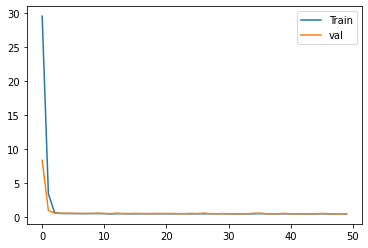

In [ ]:
# Visualized the history of loss of trained_model
plt.plot(trained_model2.history["loss"])
plt.plot(trained_model2.history["val_loss"])
plt.legend(["Train","val"],loc="upper right")
plt.show()

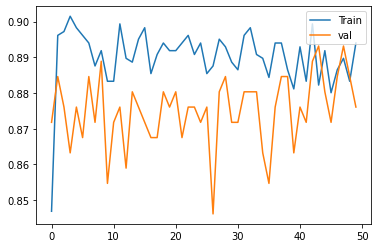

In [ ]:
#Visualized the history of accuracy of trained_model
plt.plot(trained_model2.history["accuracy"])
plt.plot(trained_model2.history["val_accuracy"])
plt.legend(["Train","val"],loc="upper right")
plt.show()

# To test the model

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)
print(y_pred[0:5])

[[1]
 [0]
 [0]
 [1]
 [0]]


In [ ]:
print(y_test[0:5])

529    1
491    0
459    0
279    1
655    0
Name: AboveMedianPrice, dtype: int64


# To Generte report

In [ ]:
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       145
           1       0.89      0.95      0.92       147

    accuracy                           0.92       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.92      0.92      0.92       292


Confusion Matrix
[[128  17]
 [  7 140]]
